The Lecture Codes below are created or modified Code References below.

Code Reference 1: Al Sweigart, Making Games with Python & Pygame. Createspace Independent Pub, 2012.
Code Reference 2: Penny de Byl, Mathematics for Game Programming and Computer Graphics. Packt Programming, 2022. 
Code Reference 3: Paul Orland, Math for Programmers - 3D graphics, machine learning, and simulations with Python. Manning, 2020.

## Defining a vector field

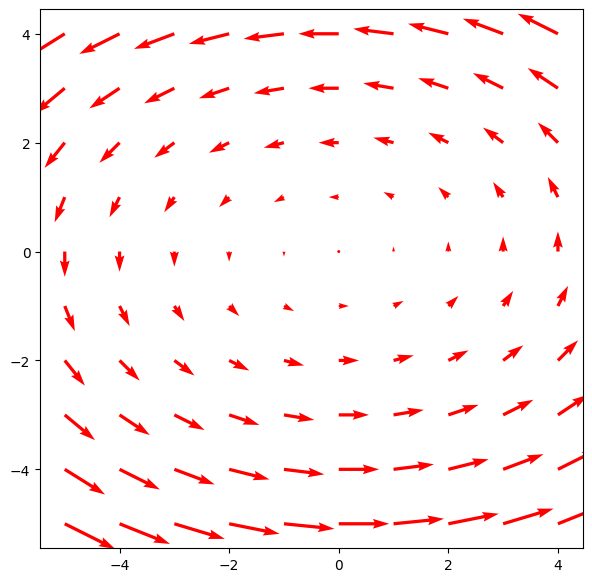

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x,y):
    return (-2*y, x)

def plot_vector_field(f,xmin,xmax,ymin,ymax,xstep=1,ystep=1):

    X,Y = np.meshgrid(np.arange(xmin,xmax, xstep),np.arange(ymin,ymax, ystep))
    U = np.vectorize(lambda x,y : f(x,y)[0])(X,Y)
    V = np.vectorize(lambda x,y : f(x,y)[1])(X,Y)
    plt.quiver(X, Y, U, V,color='red')
    fig = plt.gcf()
    fig.set_size_inches(7,7)


plot_vector_field(f,-5,5,-5,5)

## Defining a simple force field

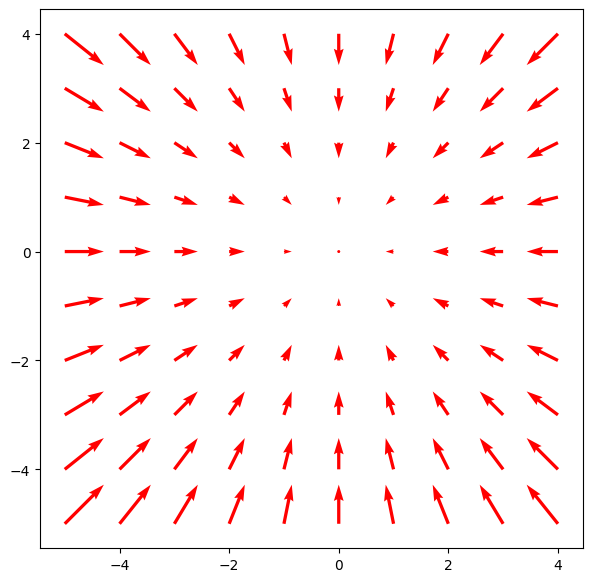

In [2]:
def f(x,y):
    return (-x,-y)

plot_vector_field(f,-5,5,-5,5)

## Defining a potential energy scalar field

In [7]:
def u(x,y):
    return 0.5 * (x**2 + y**2)
# 아래는 내가 갖고논 함수임.
def me(x,y):
    return y**2

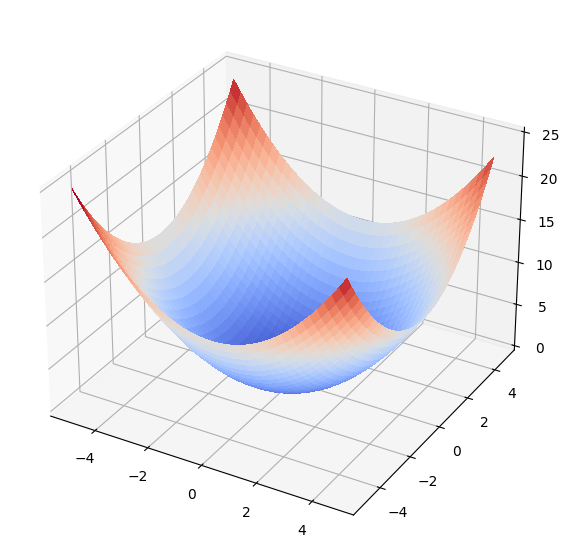

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

def plot_scalar_field(f,xmin,xmax,ymin,ymax,xstep=0.25,ystep=0.25,c=None,cmap=cm.coolwarm,alpha=1,antialiased=False):
    fig = plt.figure()
    fig.set_size_inches(7,7)
    ax = fig.add_subplot(projection='3d') # ax = fig.gca(projection='3d')
   
    # fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    fv = np.vectorize(f)
    
    # Make data.
    X = np.arange(xmin, xmax, xstep)
    Y = np.arange(ymin, ymax, ystep)
    X, Y = np.meshgrid(X, Y)
    Z = fv(X,Y)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cmap,color=c,alpha=alpha,
                           linewidth=0, antialiased=antialiased)
    
plot_scalar_field(u, -5, 5, -5, 5)

## Plotting a scalar field as a heatmap

<Figure size 700x700 with 0 Axes>

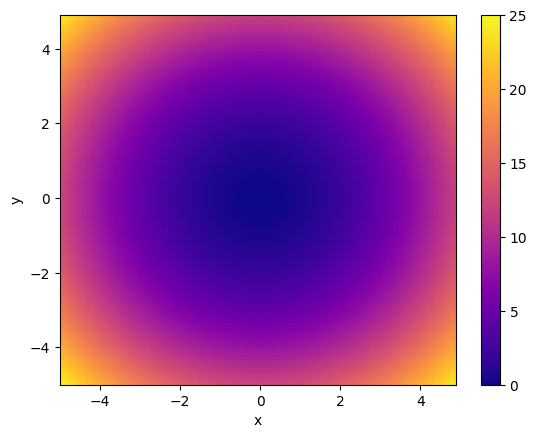

In [12]:
def scalar_field_heatmap(f,xmin,xmax,ymin,ymax,xstep=0.1,ystep=0.1):
    fig = plt.figure()
    fig.set_size_inches(7,7)

    fv = np.vectorize(f)

    X = np.arange(xmin, xmax, xstep)
    Y = np.arange(ymin, ymax, ystep)
    X, Y = np.meshgrid(X, Y)
    
    # https://stackoverflow.com/a/54088910/1704140
    z = fv(X,Y)
    
#     # x and y are bounds, so z should be the value *inside* those bounds.
#     # Therefore, remove the last value from the z array.
#     z = z[:-1, :-1]
#     z_min, z_max = -z.min(), z.max()

    fig, ax = plt.subplots()

    c = ax.pcolormesh(X,Y,z, cmap='plasma')
    # set the limits of the plot to the limits of the data
    ax.axis([X.min(), X.max(), Y.min(), Y.max()])
    fig.colorbar(c, ax=ax)
    plt.xlabel('x')
    plt.ylabel('y')

scalar_field_heatmap(u,-5,5,-5,5)

## Plotting a scalar field as a contour map

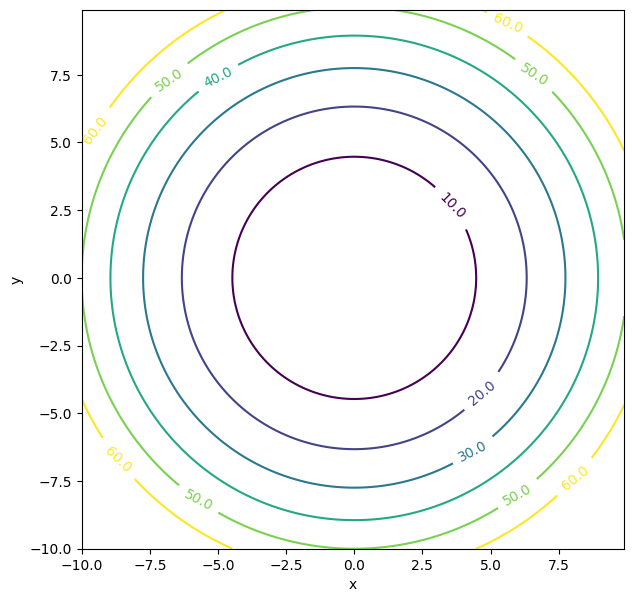

In [11]:
def scalar_field_contour(f,xmin,xmax,ymin,ymax,levels=None):

    fv = np.vectorize(f)

    X = np.arange(xmin, xmax, 0.1)
    Y = np.arange(ymin, ymax, 0.1)
    X, Y = np.meshgrid(X, Y)
    
    # https://stackoverflow.com/a/54088910/1704140
    Z = fv(X,Y)
    
    fig, ax = plt.subplots()
    CS = ax.contour(X, Y, Z,levels=levels)
    ax.clabel(CS, inline=1, fontsize=10,fmt='%1.1f')
    plt.xlabel('x')
    plt.ylabel('y')
    fig.set_size_inches(7,7)
    
scalar_field_contour(u,-10,10,-10,10,levels=[10,20,30,40,50,60])

## Connecting energy and forces with the gradient

**EXERCISE** Let's compute the force field for the $V(x,y)=1+y^2-2x^2+x^6$

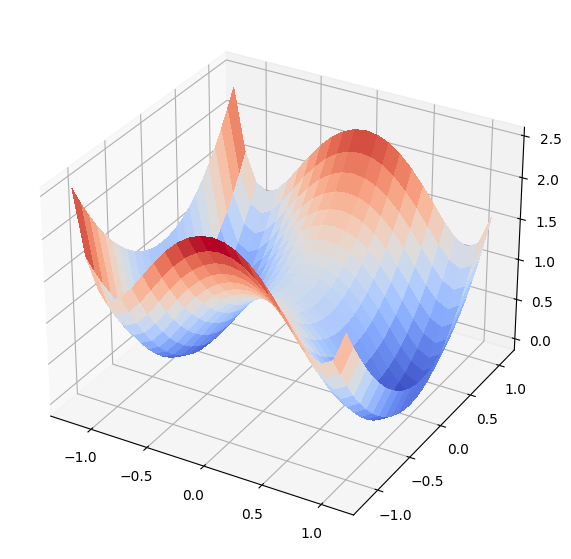

In [55]:
import numpy as np
import matplotlib.pyplot as plt

def plot_vector_field(f,xmin,xmax,ymin,ymax,xstep=0.1,ystep=0.1):

    X,Y = np.meshgrid(np.arange(xmin,xmax, xstep),np.arange(ymin,ymax, ystep))
    U = np.vectorize(lambda x,y : f(x,y)[0])(X,Y)
    V = np.vectorize(lambda x,y : f(x,y)[1])(X,Y)
    plt.quiver(X, Y, U, V,color='red')
    fig = plt.gcf()
    fig.set_size_inches(7,7)

def plot_scalar_field(f,xmin,xmax,ymin,ymax,xstep=0.1,ystep=0.1,c=None,cmap=cm.coolwarm,alpha=1,antialiased=False):
    fig = plt.figure()
    fig.set_size_inches(7,7)
    ax = fig.add_subplot(projection='3d') # ax = fig.gca(projection='3d')
   
    # fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

    fv = np.vectorize(f)
    
    # Make data.
    X = np.arange(xmin, xmax, xstep)
    Y = np.arange(ymin, ymax, ystep)
    X, Y = np.meshgrid(X, Y)
    Z = fv(X,Y)

    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cmap,color=c,alpha=alpha,
                           linewidth=0, antialiased=antialiased)

intvl = 1.2

def v(x,y):
#    return (1+y**2-2*x**2+x**6)

plot_scalar_field(v, -intvl, intvl, -intvl, intvl)


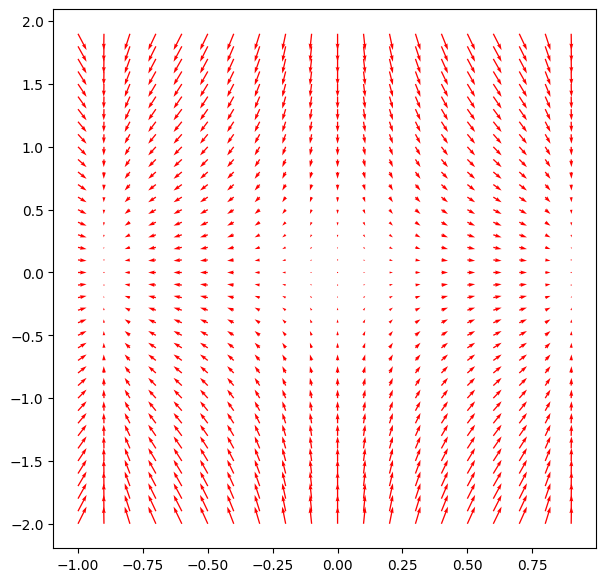

In [47]:
def f(x,y):
    # return (4*x-6*x**5,-2*y)

plot_vector_field(f,-1,1,-2,2, 0.1, 0.1)

## Adding gravity to the asteroid game

**EXERCISE** Where do all of the vectors in the vector field $(-2-x,4-y)$ point?

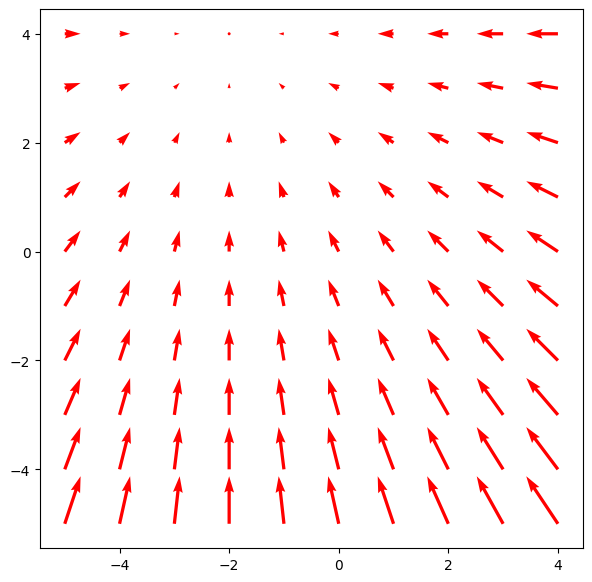

In [3]:
def g(x,y):
    return (-2-x,4-y)

plot_vector_field(g,-5,5,-5,5)